# Exercises: Introduction to pandas - Answer Key
By Christopher van Hoecke, Maxwell Margenot

## Lecture Link : 
https://www.quantopian.com/lectures/introduction-to-pandas

### IMPORTANT NOTE: 
This lecture corresponds to the Introduction to Pandas lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)


----

In [8]:
# Useful Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

----

# Exercise 1 
## a. Series 
Given an array of data, please create a pandas Series `s` with a datetime index starting `2016-01-01`. The index should be daily frequency and should be the same length as the data.

In [9]:
l = np.random.randint(1,100, size=1000)
s = pd.Series(l)

new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
s.index = new_index
print s

2016-01-01    62
2016-01-02    67
2016-01-03    30
2016-01-04    46
2016-01-05    92
2016-01-06    33
2016-01-07    99
2016-01-08    68
2016-01-09    27
2016-01-10    51
2016-01-11    86
2016-01-12    98
2016-01-13    30
2016-01-14    34
2016-01-15    57
2016-01-16    52
2016-01-17    62
2016-01-18    58
2016-01-19    32
2016-01-20    43
2016-01-21    24
2016-01-22    92
2016-01-23    77
2016-01-24    46
2016-01-25    81
2016-01-26     1
2016-01-27    13
2016-01-28    14
2016-01-29    59
2016-01-30    40
              ..
2018-08-28    46
2018-08-29    58
2018-08-30    79
2018-08-31    48
2018-09-01     1
2018-09-02    19
2018-09-03     6
2018-09-04    12
2018-09-05    17
2018-09-06    56
2018-09-07    25
2018-09-08    63
2018-09-09     7
2018-09-10    99
2018-09-11     1
2018-09-12    12
2018-09-13    35
2018-09-14    68
2018-09-15    98
2018-09-16    77
2018-09-17    80
2018-09-18    41
2018-09-19    42
2018-09-20    91
2018-09-21    81
2018-09-22    80
2018-09-23     3
2018-09-24    

## b. Accessing Series Elements.
- Print every other element of the first 50 elements of series `s`.
- Find the value associated with the index `2017-02-20`.

In [10]:
# Print every other element of the first 50 elements
s.iloc[:50:2];
# Values associated with the index 2017-02-20
s.loc['2017-02-20']

38

## c. Boolean Indexing.
In the series `s`, print all the values between 1 and 3.

In [11]:
# Print s between 1 and 3
s.loc[(s>1) & (s<3)]

2016-05-06    2
2016-08-17    2
2017-06-29    2
2017-09-24    2
2017-10-27    2
2018-03-18    2
2018-07-26    2
dtype: int64

----

#Exercise 2 : Indexing and time series. 
###a. Display
Print the first and last 5 elements of the series `s`.

In [12]:
# First 5 elements
s.head(5)
# Last 5 elements
s.tail(5)

2018-09-22    80
2018-09-23     3
2018-09-24    85
2018-09-25    52
2018-09-26    78
Freq: D, dtype: int64

### b. Resampling
- Using the resample method, upsample the daily data to monthly frequency. Use the median method so that each monthly value is the median price of all the days in that month.
- Take the daily data and fill in every day, including weekends and holidays, using forward-fills. 

In [13]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

# Resample daily prices to get monthly prices using median. 
monthly_prices = prices.resample('M').median()
monthly_prices.head(24)

2012-01-31 00:00:00+00:00    355.380
2012-02-29 00:00:00+00:00    378.295
2012-03-31 00:00:00+00:00    408.850
2012-04-30 00:00:00+00:00    420.900
2012-05-31 00:00:00+00:00    405.390
2012-06-30 00:00:00+00:00    402.790
2012-07-31 00:00:00+00:00    380.370
2012-08-31 00:00:00+00:00    295.380
2012-09-30 00:00:00+00:00    332.990
2012-10-31 00:00:00+00:00    286.440
2012-11-30 00:00:00+00:00    263.559
2012-12-31 00:00:00+00:00    282.040
2013-01-31 00:00:00+00:00    299.570
2013-02-28 00:00:00+00:00    315.520
2013-03-31 00:00:00+00:00    321.510
2013-04-30 00:00:00+00:00    340.875
2013-05-31 00:00:00+00:00    369.900
2013-06-30 00:00:00+00:00    364.080
2013-07-31 00:00:00+00:00    386.145
2013-08-31 00:00:00+00:00    405.190
2013-09-30 00:00:00+00:00    418.919
2013-10-31 00:00:00+00:00    442.150
2013-11-30 00:00:00+00:00    535.985
2013-12-31 00:00:00+00:00    522.864
Freq: M, Name: Equity(28016 [CMG]), dtype: float64

In [14]:
# Data for every day, (including weekends and holidays)
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01 00:00:00+00:00        NaN
2012-01-02 00:00:00+00:00        NaN
2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
2012-01-11 00:00:00+00:00    347.330
2012-01-12 00:00:00+00:00    347.830
2012-01-13 00:00:00+00:00    354.390
2012-01-14 00:00:00+00:00    354.390
2012-01-15 00:00:00+00:00    354.390
Freq: D, Name: Equity(28016 [CMG]), dtype: float64

---

# Exercise 3 : Missing Data
- Replace all instances of `NaN` using the forward fill method. 
- Instead of filling, remove all instances of `NaN` from the data.

In [15]:
# Fill missing data using Backwards fill method
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01 00:00:00+00:00    340.980
2012-01-02 00:00:00+00:00    340.980
2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
Freq: D, Name: Equity(28016 [CMG]), dtype: float64

In [16]:
# Drop instances of nan in the data
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
2012-01-11 00:00:00+00:00    347.330
2012-01-12 00:00:00+00:00    347.830
Freq: D, Name: Equity(28016 [CMG]), dtype: float64

----

#Exercise 4 : Time Series Analysis with pandas
## a. General Information
Print the count, mean, standard deviation, minimum, 25th, 50th, and 75th percentiles, and the max of our series s. 

In [17]:
print "Summary Statistics"
print prices.describe()

Summary Statistics
count    1006.000000
mean      501.637439
std       146.697204
min       236.240000
25%       371.605000
50%       521.280000
75%       646.753750
max       757.770000
Name: Equity(28016 [CMG]), dtype: float64


## b. Series Operations
- Get the additive and multiplicative returns of this series. 
- Calculate the rolling mean with a 60 day window.
- Calculate the standard deviation with a 60 day window.

In [18]:
data = get_pricing('GE', fields='open_price', start_date='2016-01-01', end_date='2017-01-01')

mult_returns = data.pct_change()[1:] #Multiplicative returns 
add_returns = data.diff()[1:] #Additive returns 

In [19]:
# Rolling mean
rolling_mean = data.rolling(window=60).mean()
rolling_mean.name = "60-day rolling mean"

In [20]:
# Rolling Standard Deviation
rolling_std = data.rolling(window=60).std()
rolling_std.name = "60-day rolling volatility"

----

# Exercise 5 : DataFrames
## a. Indexing
Form a DataFrame out of `dict_data` with `l` as its index.

In [21]:
l = ['First','Second', 'Third', 'Fourth', 'Fifth']
dict_data = {'a' : [1, 2, 3, 4, 5], 
             'b' : ['L', 'K', 'J', 'M', 'Z'],
             'c' : np.random.normal(0, 1, 5)
            }

# Adding l as an index to dict_data
frame_data = pd.DataFrame(dict_data, index=l)
print frame_data

        a  b         c
First   1  L -1.902776
Second  2  K  0.512887
Third   3  J -1.042481
Fourth  4  M  0.113445
Fifth   5  Z  0.538031


## b. DataFrames Manipulation
- Concatenate the following two series to form a dataframe. 
- Rename the columns to `Good Numbers` and `Bad Numbers`. 
- Change the index to be a datetime index starting on `2016-01-01`.

In [22]:
s1 = pd.Series([2, 3, 5, 7, 11, 13], name='prime')
s2 = pd.Series([1, 4, 6, 8, 9, 10], name='other')

numbers = pd.concat([s1, s2], axis=1) # Concatenate the two series
numbers.columns = ['Useful Numbers', 'Not Useful Numbers'] # Rename the two columns
numbers.index = pd.date_range("2016-01-01", periods=len(numbers)) # Index change
print numbers

            Useful Numbers  Not Useful Numbers
2016-01-01               2                   1
2016-01-02               3                   4
2016-01-03               5                   6
2016-01-04               7                   8
2016-01-05              11                   9
2016-01-06              13                  10


----

# Exercise 6 : Accessing DataFrame elements.
## a. Columns
- Check the data type of one of the DataFrame's columns.
- Print the values associated with time range `2013-01-01` to `2013-01-10`.

In [23]:
symbol = ["XOM", "BP", "COP", "TOT"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol

# Check Type of Data for these two.    
prices.XOM.head()
prices.loc[:, 'XOM'].head()

2012-01-03 00:00:00+00:00    76.706
2012-01-04 00:00:00+00:00    76.804
2012-01-05 00:00:00+00:00    76.518
2012-01-06 00:00:00+00:00    76.054
2012-01-09 00:00:00+00:00    76.286
Freq: C, Name: XOM, dtype: float64

In [24]:
# Print data type
print type(prices.XOM)
print type(prices.loc[:, 'XOM'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [25]:
# Print values associated with time range
prices.loc['2013-01-01':'2013-01-10']

,XOM,BP,COP,TOT
2013-01-02 00:00:00+00:00,81.186,36.119,52.038,45.732
2013-01-03 00:00:00+00:00,81.040,36.843,52.021,45.366
2013-01-04 00:00:00+00:00,81.360,37.183,52.592,45.523
2013-01-07 00:00:00+00:00,80.472,36.953,52.003,44.966
2013-01-08 00:00:00+00:00,80.912,36.953,51.309,44.853
2013-01-09 00:00:00+00:00,80.674,37.685,51.203,44.844
2013-01-10 00:00:00+00:00,81.561,38.315,51.441,45.584


----

# Exercise 7 : Boolean Indexing
## a. Filtering.
- Filter pricing data from the last question (stored in `prices`) to only print values where:
    - BP > 30
    - XOM < 100
    - The intersection of both above conditions (BP > 30 **and** XOM < 100)
    - The union of the previous composite condition along with TOT having no `nan` values ((BP > 30 **and** XOM < 100) **or** TOT is non-`NaN`).
- Add a column for TSLA and drop the column for XOM.

In [26]:
# Filter data 
# BP > 30
print prices.loc[prices.BP > 30].head()
# XOM < 100
print prices.loc[prices.XOM < 100].head()
# BP > 30 AND XOM < 100
print prices.loc[(prices.BP > 30) & (prices.XOM < 100)].head()
# The union of (BP > 30 AND XOM < 100) with TOT being non-nan
print prices.loc[((prices.BP > 30) & (prices.XOM < 100)) | (~ prices.TOT.isnull())].head()

                              XOM      BP     COP     TOT
2012-01-03 00:00:00+00:00  76.706  35.867  47.522  43.390
2012-01-04 00:00:00+00:00  76.804  36.371  47.304  43.200
2012-01-05 00:00:00+00:00  76.518  35.949  46.913  42.356
2012-01-06 00:00:00+00:00  76.054  35.819  46.561  41.951
2012-01-09 00:00:00+00:00  76.286  35.811  46.721  42.381
                              XOM      BP     COP     TOT
2012-01-03 00:00:00+00:00  76.706  35.867  47.522  43.390
2012-01-04 00:00:00+00:00  76.804  36.371  47.304  43.200
2012-01-05 00:00:00+00:00  76.518  35.949  46.913  42.356
2012-01-06 00:00:00+00:00  76.054  35.819  46.561  41.951
2012-01-09 00:00:00+00:00  76.286  35.811  46.721  42.381
                              XOM      BP     COP     TOT
2012-01-03 00:00:00+00:00  76.706  35.867  47.522  43.390
2012-01-04 00:00:00+00:00  76.804  36.371  47.304  43.200
2012-01-05 00:00:00+00:00  76.518  35.949  46.913  42.356
2012-01-06 00:00:00+00:00  76.054  35.819  46.561  41.951
2012-01-09 00:

In [27]:
# Adding TSLA 
s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:, 'TSLA'] = s_1

# Dropping XOM
prices = prices.drop('XOM', axis=1)
prices.head(5)

,BP,COP,TOT,TSLA
2012-01-03 00:00:00+00:00,35.867,47.522,43.390,28.06
2012-01-04 00:00:00+00:00,36.371,47.304,43.200,27.71
2012-01-05 00:00:00+00:00,35.949,46.913,42.356,27.12
2012-01-06 00:00:00+00:00,35.819,46.561,41.951,26.94
2012-01-09 00:00:00+00:00,35.811,46.721,42.381,27.21


## b. DataFrame Manipulation (again)
- Concatenate these DataFrames.
- Fill the missing data with 0s

In [28]:
df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
# Concatenate the dataframes
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

,Equity(8554 [SPY]),Equity(51653 [VXX]),Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(46631 [GOOG])
2012-01-03 00:00:00+00:00,118.414,NaN,23.997,54.684,NaN
2012-01-04 00:00:00+00:00,118.498,NaN,24.498,54.995,NaN
2012-01-05 00:00:00+00:00,118.850,NaN,24.749,55.597,NaN
2012-01-06 00:00:00+00:00,118.600,NaN,25.151,56.194,NaN
2012-01-09 00:00:00+00:00,118.795,NaN,24.811,56.098,NaN


In [29]:
# Fill GOOG missing data with nan
filled0_df_3 = df_3.fillna(0)
filled0_df_3.head(5)

,Equity(8554 [SPY]),Equity(51653 [VXX]),Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(46631 [GOOG])
2012-01-03 00:00:00+00:00,118.414,0.0,23.997,54.684,0.0
2012-01-04 00:00:00+00:00,118.498,0.0,24.498,54.995,0.0
2012-01-05 00:00:00+00:00,118.850,0.0,24.749,55.597,0.0
2012-01-06 00:00:00+00:00,118.600,0.0,25.151,56.194,0.0
2012-01-09 00:00:00+00:00,118.795,0.0,24.811,56.098,0.0


---

# Exercise 8 : Time Series Analysis
## a. Summary
- Print out a summary of the `prices` DataFrame from above.
- Take the log returns and print the first 10 values.
- Print the multiplicative returns of each company.
- Normalize and plot the returns from 2014 to 2015.
- Plot a 60 day window rolling mean of the prices.
- Plot a 60 day window rolling standfard deviation of the prices.

In [30]:
# Summary
prices.describe()

,BP,COP,TOT,TSLA
count,1006.000000,1006.000000,1006.000000,1006.000000
mean,38.079349,58.185060,49.209090,147.455109
std,4.122068,9.379062,7.354246,89.673401
min,28.911000,41.647000,35.264000,22.750000
25%,35.382250,49.921250,44.005500,35.085000
50%,37.366500,57.437000,47.947500,178.125000
75%,40.820750,64.554000,53.452000,227.107500
max,48.904000,81.824000,68.841000,286.040000


In [31]:
# Natural Log of the returns and print out the first 10 values
np.log(prices).head(10)

,BP,COP,TOT,TSLA
2012-01-03 00:00:00+00:00,3.579818,3.861193,3.770229,3.334345
2012-01-04 00:00:00+00:00,3.593772,3.856595,3.765840,3.321793
2012-01-05 00:00:00+00:00,3.582101,3.848295,3.746110,3.300271
2012-01-06 00:00:00+00:00,3.578478,3.840763,3.736502,3.293612
2012-01-09 00:00:00+00:00,3.578255,3.844194,3.746700,3.303585
2012-01-10 00:00:00+00:00,3.586154,3.849254,3.751948,3.318540
2012-01-11 00:00:00+00:00,3.578004,3.831507,3.738288,3.340385
2012-01-12 00:00:00+00:00,3.581183,3.814256,3.724801,3.341093
2012-01-13 00:00:00+00:00,3.571418,3.808594,3.714182,3.124565
2012-01-17 00:00:00+00:00,3.582101,3.814256,3.742017,3.279030


In [32]:
# Multiplicative returns
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,BP,COP,TOT,TSLA
2012-01-04 00:00:00+00:00,0.014052,-0.004587,-0.004379,-0.012473
2012-01-05 00:00:00+00:00,-0.011603,-0.008266,-0.019537,-0.021292
2012-01-06 00:00:00+00:00,-0.003616,-0.007503,-0.009562,-0.006637
2012-01-09 00:00:00+00:00,-0.000223,0.003436,0.010250,0.010022
2012-01-10 00:00:00+00:00,0.007931,0.005073,0.005262,0.015068


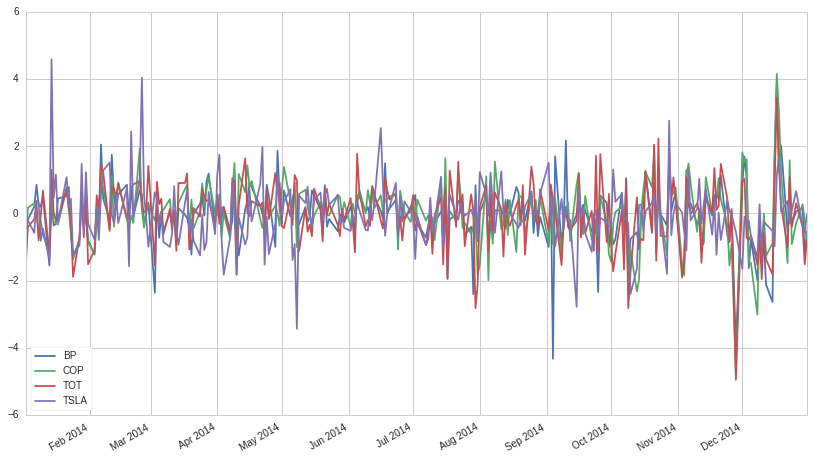

In [33]:
# Normalizing the returns and plotting one year of data
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

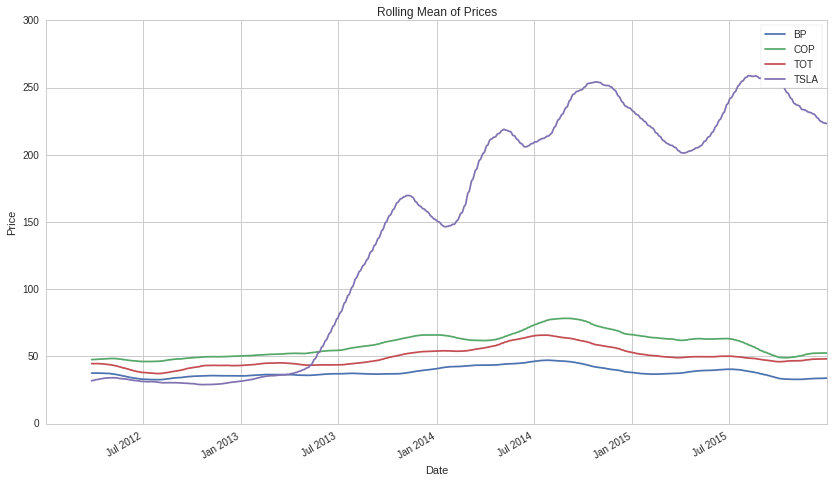

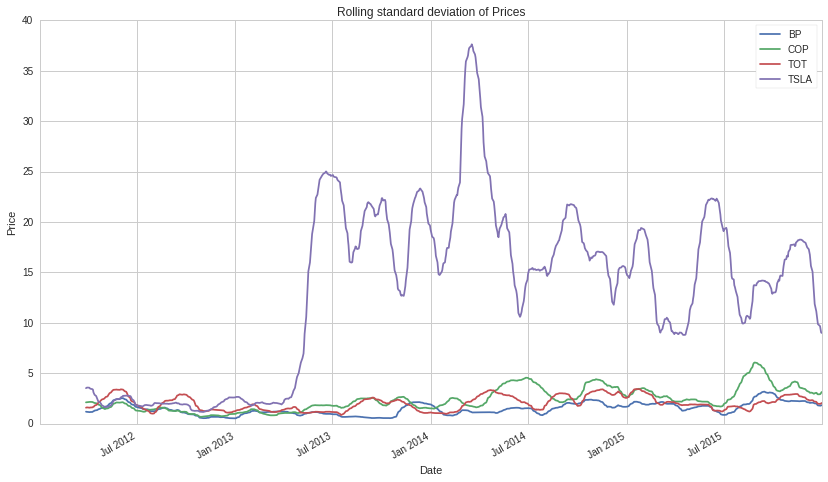

In [34]:
# Rolling mean
rolling_mean = prices.rolling(window=60).mean()
rolling_mean.columns = prices.columns

# Rolling standard deviation
rolling_std = prices.rolling(window=60).std()
rolling_mean.columns = prices.columns

# Plotting 
mean = rolling_mean.plot();
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

std = rolling_std.plot();
plt.title("Rolling standard deviation of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

---

Congratulations on completing the Introduction to pandas exercises!

As you learn more about writing trading algorithms and the Quantopian platform, be sure to check out the daily [Quantopian Contest](https://www.quantopian.com/contest), in which you can compete for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) Tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*